##Image Classification Using CNN using mnist

In [ ]:
#keras imports for the dataset and building the neural network
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import to_categorical

#to calculate accuracy
from sklearn.metrics import accuracy_score

#for plotting images
import matplotlib.pyplot as plt



In [ ]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#printing the shape of the dataset
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)


X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


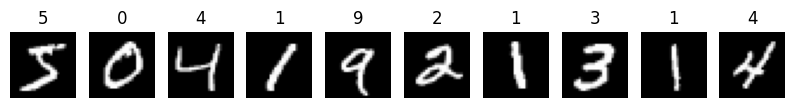

In [ ]:
#previewing dataset
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.show()


In [ ]:
#building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalizing the data to help with the training
X_train /= 255
X_test /= 255


In [ ]:
#one-hot encoding
n_classes = 10
print("Shape before one hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one hot encoding: ", Y_train.shape)

Shape before one hot encoding:  (60000,)
Shape after one hot encoding:  (60000, 10)


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()

#Adding layers

#convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
#maxpooling layer(reduces the spatial dimensions of the input volume)
model.add(MaxPool2D(pool_size=(1,1)))
#flatten layer (flattens the input 2D to 1D)
model.add(Flatten())
#dense layer (hidden layer)
model.add(Dense(100, activation='relu'))
#dense layer (output layer)
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
#model summary
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 26, 26, 25)        0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 16900)             0         
                                                                 
 dense_22 (Dense)            (None, 100)               1690100   
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 1691360 (6.45 MB)
Trainable params: 1691360 (6.45 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

In [ ]:
#training the model for 10 epochs and capturing the history
history = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_test, Y_test))


Epoch 1/10
469/469 [==============================] - 55s 117ms/step - loss: 0.2026 - accuracy: 0.9412 - val_loss: 0.0793 - val_accuracy: 0.9749
Epoch 2/10
469/469 [==============================] - 52s 110ms/step - loss: 0.0616 - accuracy: 0.9820 - val_loss: 0.0613 - val_accuracy: 0.9801
Epoch 3/10
469/469 [==============================] - 50s 108ms/step - loss: 0.0362 - accuracy: 0.9887 - val_loss: 0.0555 - val_accuracy: 0.9824
Epoch 4/10
469/469 [==============================] - 48s 103ms/step - loss: 0.0227 - accuracy: 0.9933 - val_loss: 0.0570 - val_accuracy: 0.9823
Epoch 5/10
469/469 [==============================] - 45s 97ms/step - loss: 0.0142 - accuracy: 0.9959 - val_loss: 0.0571 - val_accuracy: 0.9824
Epoch 6/10
469/469 [==============================] - 44s 94ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0543 - val_accuracy: 0.9826
Epoch 7/10
469/469 [==============================] - 45s 95ms/step - loss: 0.0083 - accuracy: 0.9976 - val_loss: 0.0612 - val_accur

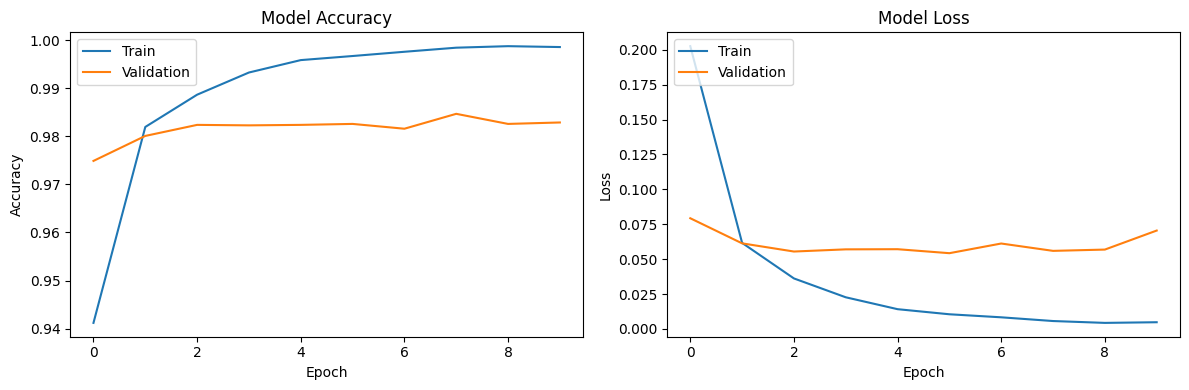

In [ ]:
# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
# Evaluating the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


Test Accuracy: 98.29%
